In [1]:
%matplotlib inline
import random
import scipy
from scipy import stats
from scipy.stats import linregress
from matplotlib import mlab
import matplotlib.pyplot as plt
from scipy.linalg import eig
from scipy import integrate
from scipy.special import erfc
import numpy as np
from numpy.linalg import norm, inv
#from IPython.core.pylabtools import figsize
from scipy.integrate import odeint
from matplotlib import rc
rc('text', usetex=True)
from IPython.display import clear_output

# Isotopic variation and diet variation

## Generation of samples 

In [4]:
K=1000 #number of systems (points in the plots)

var_y=np.linspace(0,0,K)
Baseline=np.linspace(0,0,K)
Lbda_mean=np.linspace(0,0,K)
mean_Lbda=np.linspace(0,0,K)

Phi_abs=np.linspace(0,0,K)
Phi_mean=np.linspace(0,0,K)

Base_abs=np.linspace(0,0,K)
Base_mean=np.linspace(0,0,K)

nn=np.linspace(0,0,K)
aniso=np.linspace(0,0,K)

W=100  #number of individuals sampled
k=0
while k<K:
    n=np.random.randint(3,14) #number of food sources
    
    ##DIET############################################
    X=np.random.normal(0,1,size=n)
    p=(X/norm(X))**2              #uniform sampling of the simplex (mean of the diet distribution)
    alpha_0=np.random.uniform(.1,10) #1/(alpha_0+1) controls the variance of the distribution
    alpha=alpha_0*p
    
    Fwi=np.random.dirichlet(alpha,size=W)          #Wxn matrix
    Cij=np.cov(Fwi,rowvar=False)                   #diet covariance: n x n matrix
    sigma=np.real(eig(Cij)[0])
    sigma=sigma/sum(sigma)
    aniso[k]=norm(sigma)**2                        #anisotropy
    simpson_w=np.sum(Fwi**2,axis=1)
    mean_simpson=np.mean(simpson_w)                #mean simpson index of diet
    mean_Lbda[k]=mean_simpson
    F_bar=np.mean(Fwi,axis=0)                      
    simpson_mean=np.sum(F_bar**2)                  #simpson index of mean diet
    Lbda_mean[k]=simpson_mean
    ####################################################
    
    #ci=10**np.random.uniform(-2,0,size=n) #concentrations
    #ci=ci/sum(ci)
    #pw=np.reshape(ci,(1,n))*fw
    #pw=pw/np.reshape(np.sum(pw,axis=1),(100,1)) #actual diet
    
    ##source terms#####################################
    xmean=np.random.uniform(0.1,10,size=n) #distribution of mean source signal
    sig_x=np.random.uniform(0.,.99)        #within-source variation
    Xwi=(1+sig_x*np.random.uniform(-1,1.,size=(W,n)))*np.reshape(xmean,(1,n)) #effective source signal per individual   
    X_var=np.var(Xwi,axis=0)
    #relevant statistics
    Sigma_x=np.sum(X_var)
    Px_wi=Xwi-np.reshape(np.mean(Xwi,axis=1),(W,1))
    Px_i=np.mean(Px_wi,axis=0)
    normPx=norm(Px_i)**2
    
    #baseline (for generic prediction)
    baseline0=normPx+Sigma_x
    phi=normPx/baseline0
    baseline=(n-1)*normPx/n+Sigma_x
    Phi_abs[k]=phi
    Base_abs[k]=baseline
    
    #baseline^* (for general upper bound)
    baseline0=normPx/(n-1)+Sigma_x/n
    phi=normPx/(n-1)/baseline0
    baseline=normPx/n+Sigma_x/n
    Phi_mean[k]=phi
    Base_mean[k]=baseline
    ##################################################
    
    
    yw=np.sum(Fwi*Xwi,axis=1) #isotopic content of consumers
    var_y[k]=np.var(yw)       #population isotopic variance
    
    nn[k]=n                   #record number of food sources
    #clear_output(wait=True)
    #if k%10==0:
    #    print k+1, '/',K+1
    k=k+1
print "DONE"

DONE


## visualization of diet and isotopic landscape generated

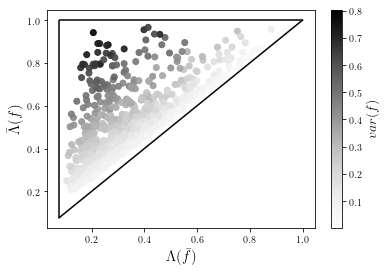

In [5]:
S=max(nn)
eps=100#4/3.
#k=np.random.randint(0,K)
Var=(mean_Lbda-Lbda_mean)*nn/(nn-1)
x=np.linspace(1./S,1,10)
plt.scatter(Lbda_mean[aniso<=eps],mean_Lbda[aniso<=eps],alpha=0.9,c=Var[aniso<=eps],cmap='Greys')
plt.xlabel(r'$\Lambda(\bar{f})$',fontsize=15)
plt.ylabel(r'$\bar{\Lambda}(f)$',fontsize=15)
plt.plot(x,x,'-k')
plt.vlines(1./S,1./S,1)
plt.hlines(1,1./S,1)
cbar=plt.colorbar()
cbar.set_label(r'$var(f)$', fontsize=14)
#plt.plot(x,var_y[k]*S/(S-1)-(1-Phi[k])*x)
#plt.xlim(0.08,0.2)
#plt.ylim(0.08,1)

Text(0.5,0,'$\\phi,\\;\\phi^*$')

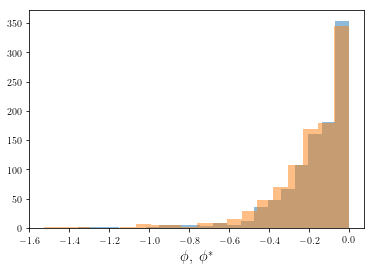

In [6]:
plt.hist(np.log10(Phi_mean),bins=20,alpha=0.5);
plt.hist(np.log10(Phi_abs),bins=20,alpha=0.5);
plt.xlabel('$\phi,\;\phi^*$',fontsize=15)

Text(0.5,0,'baseline$^*$ (blue), baseline (orange)')

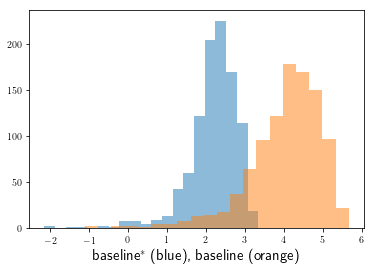

In [7]:
plt.hist(np.log(Base_mean),bins=20,alpha=0.5);
plt.hist(np.log(Base_abs),bins=20,alpha=0.5);
plt.xlabel('baseline$^*$ (blue), baseline (orange)',fontsize=15)

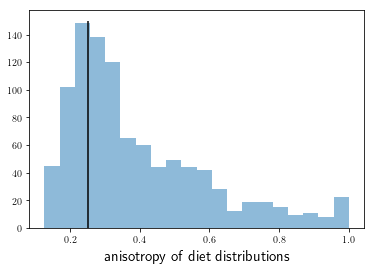

In [8]:
plt.hist(aniso,bins=20,alpha=0.5);
plt.xlabel('anisotropy of diet distributions',fontsize=15)
plt.vlines(0.25,0,150) #indication of cut-off for later

## Test of analytical prediction 

### Upper bound

Text(0,0.5,'$\\frac{S}{S-\\phi} (\\Lambda(\\bar{f}) -\\phi \\Lambda(\\bar{f}))$')

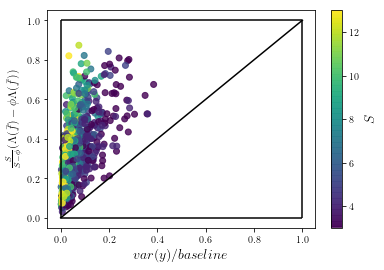

In [9]:
V_abs=var_y/Base_abs
Vphi_abs=(mean_Lbda-Phi_abs*Lbda_mean)*(nn/(nn-Phi_abs))

plt.scatter(V_abs,Vphi_abs,alpha=0.8,c=nn)#Phi_abs)#,cmap='Greys')
plt.plot([0,1],[0,1],'k-')
plt.hlines(1,0,1)
plt.vlines(0,0,1)
plt.vlines(1,0,1)
plt.hlines(0,0,1)

cbar=plt.colorbar()
cbar.set_label('$S$', fontsize=14)

plt.xlabel(r'$var(y)/baseline$',fontsize=14)
plt.ylabel(r'$\frac{S}{S-\phi} (\Lambda(\bar{f}) -\phi \Lambda(\bar{f}))$',fontsize=12)

### Generic relationship (unfilterred)

Text(0,0.5,'$\\frac{S}{S-\\phi^*} (\\Lambda(\\bar{f}) -\\phi^* \\Lambda(\\bar{f}))$')

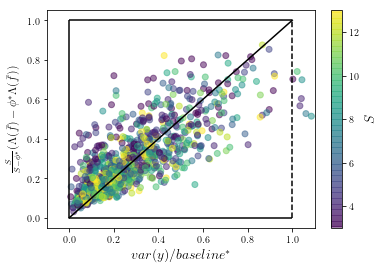

In [14]:
V_mean=var_y/Base_mean
Vphi_mean=(mean_Lbda-Phi_abs*Lbda_mean)*(nn/(nn-Phi_mean))

eps=1. #anisotropy cut-off (here no cut-off)

plt.scatter(V_mean[aniso<=eps],Vphi_mean[aniso<=eps],alpha=0.5,c=nn[aniso<=eps])
plt.plot([0,1],[0,1],'k-')
plt.hlines(1,0,1)
plt.vlines(0,0,1)
plt.vlines(1,0,1,linestyles='dashed')
plt.hlines(0,0,1)
plt.xlim(-0.1,1.1)


cbar=plt.colorbar()
cbar.set_label('$S$', fontsize=14)

plt.xlabel(r'$var(y)/baseline^*$',fontsize=14)
plt.ylabel(r'$\frac{S}{S-\phi^*} (\Lambda(\bar{f}) -\phi^* \Lambda(\bar{f}))$',fontsize=12)
#plt.savefig('vary_var_generic.pdf')

### Generic relationship (filterred)

Text(0,0.5,'$\\frac{S}{S-\\phi^*} (\\Lambda(\\bar{f}) -\\phi^* \\Lambda(\\bar{f}))$')

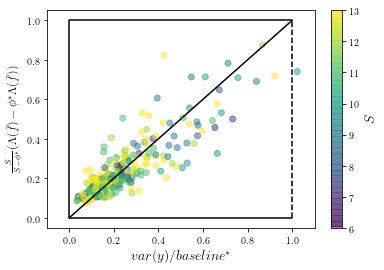

In [13]:
V_mean=var_y/Base_mean
Vphi_mean=(mean_Lbda-Phi_abs*Lbda_mean)*(nn/(nn-Phi_mean))

eps=.25 #anisotropy cut-off 

plt.scatter(V_mean[aniso<=eps],Vphi_mean[aniso<=eps],alpha=0.5,c=nn[aniso<=eps])
plt.plot([0,1],[0,1],'k-')
plt.hlines(1,0,1)
plt.vlines(0,0,1)
plt.vlines(1,0,1,linestyles='dashed')
plt.hlines(0,0,1)

plt.xlim(-0.1,1.1)
cbar=plt.colorbar()
cbar.set_label('$S$', fontsize=14)

plt.xlabel(r'$var(y)/baseline^*$',fontsize=14)
plt.ylabel(r'$\frac{S}{S-\phi^*} (\Lambda(\bar{f}) -\phi^* \Lambda(\bar{f}))$',fontsize=12)
#plt.savefig('vary_var_generic_filterred.pdf')